# Embedding

Description

In [1]:
# Reload the notebook if an external file is updated
%load_ext autoreload
%autoreload 2

import sys
import warnings

from pathlib import Path
from tqdm import TqdmExperimentalWarning

path = str(Path.cwd().parent)
sys.path.append(path)

warnings.simplefilter(
    'ignore', 
    TqdmExperimentalWarning
)

In [2]:
import matplotlib.pyplot as plt
import numpy as np

from avgn.signalprocessing.create_spectrogram_dataset import flatten_spectrograms
from avgn.visualization.projections import (
    scatter_projections,
    scatter_spec,
    draw_projection_transitions,
)
from avgn.visualization.quickplots import draw_projection_plots
from avgn.visualization.spectrogram import draw_spec_set
from datatype.dataset import Dataset
from datatype.spectrogram import flatten
from umap import UMAP

In [3]:
dataset = Dataset('avgn')
dataframe = dataset.load()

In [4]:
spectrogram = dataframe.spectrogram.tolist()

Text(0.5, 1.0, 'min')

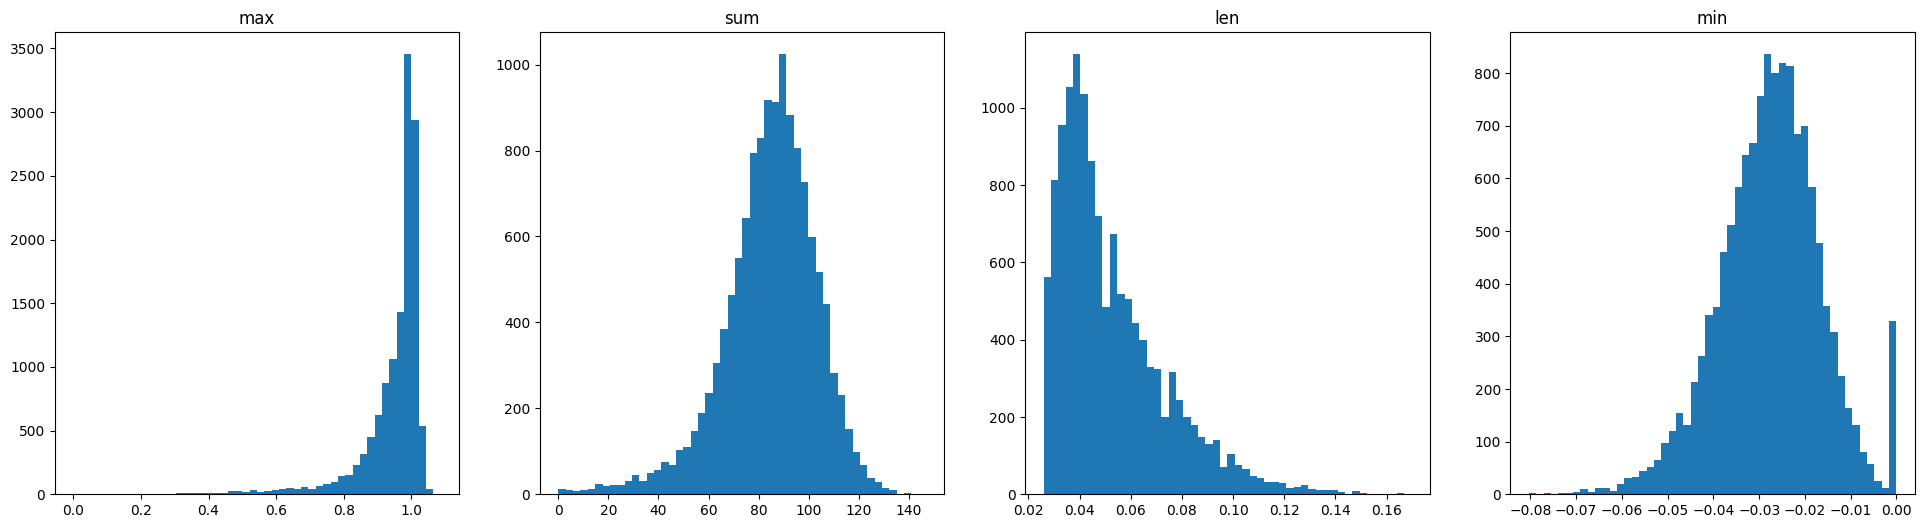

In [5]:
figsize = (24, 6)
fig, axs = plt.subplots(ncols=4, figsize=figsize)

time = dataframe.end_time - dataframe.start_time

axs[0].hist([np.max(i) for i in spectrogram], bins=50)
axs[0].set_title('max')

axs[1].hist([np.sum(i) for i in spectrogram], bins=50)
axs[1].set_title('sum')

axs[2].hist(time.tolist(), bins=50)
axs[2].set_title('len')

axs[3].hist([np.min(i) for i in spectrogram], bins=50)
axs[3].set_title('min')

<AxesSubplot: >

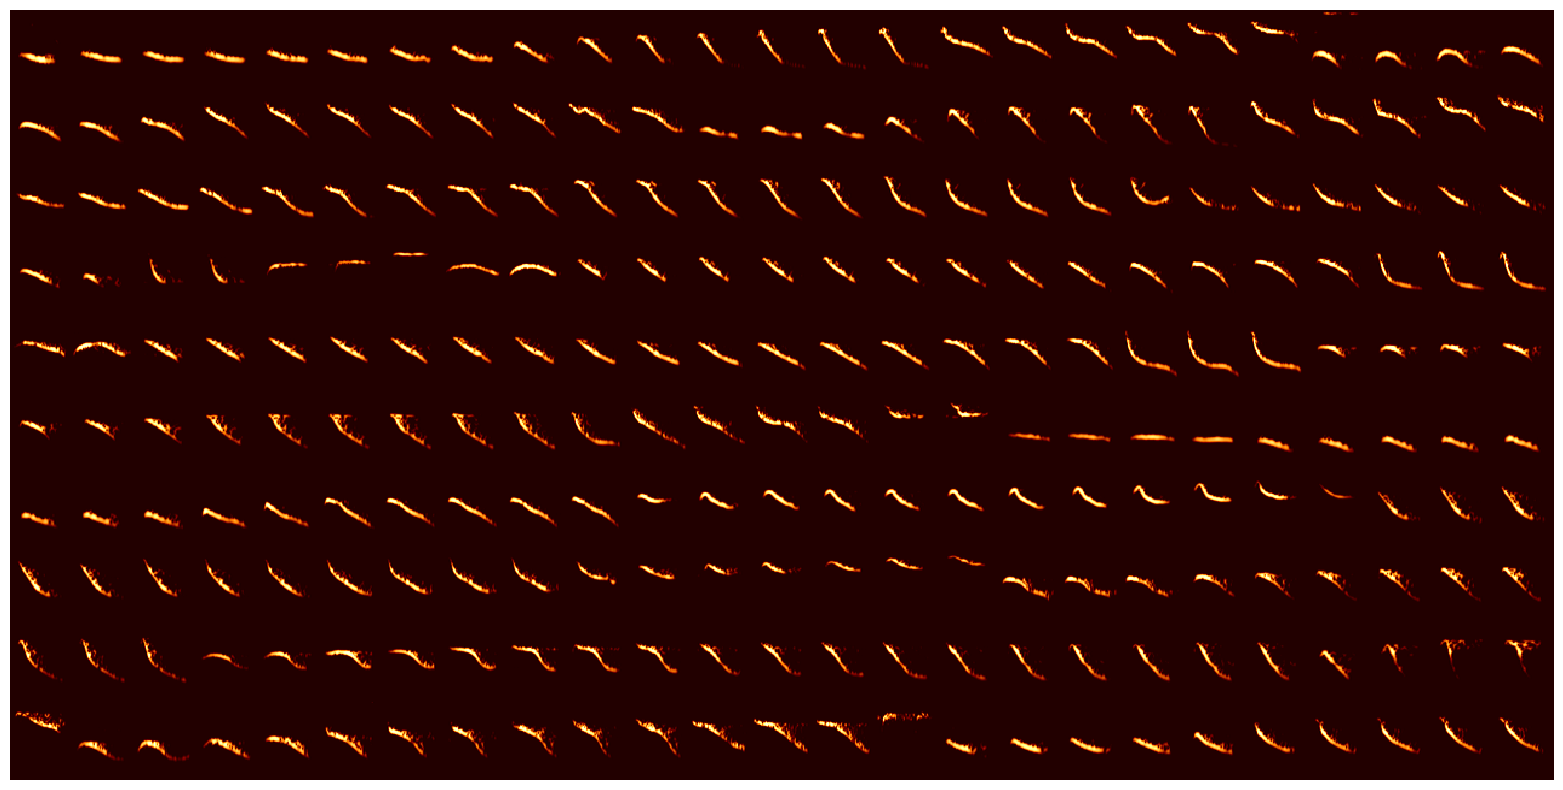

In [6]:
draw_spec_set(
    spectrogram, 
    zoom=1, 
    maxrows=10, 
    colsize=25
)

Text(0.5, 1.0, "Adelaide's warbler")

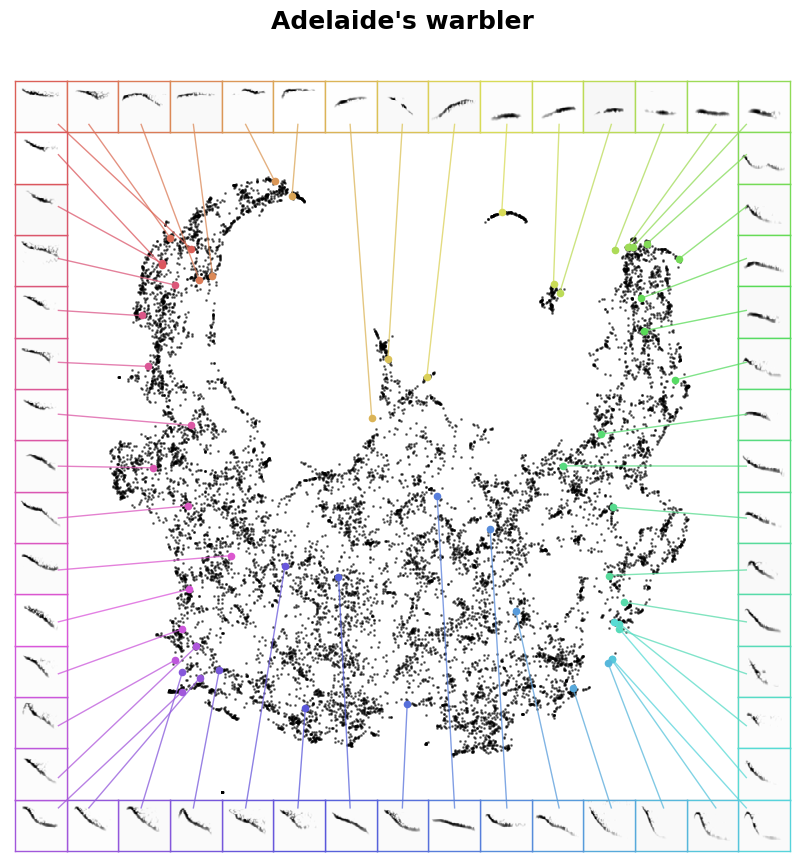

In [8]:
by = ['start_time']
ascending = [True]

dataframe = dataframe.sort_values(ascending=ascending, by=by)

spectrogram = dataframe.spectrogram.tolist()

flattened = flatten_spectrograms(spectrogram)

fit = UMAP(
    low_memory=True,
    metric='euclidean',
    min_dist=0.0,
    n_neighbors=10,
    n_components=2,
    n_jobs=-1
)

projection = fit.fit_transform(flattened)
projection = list(projection)

dataframe['umap'] = projection

_, _, ax, _ = scatter_spec(
    projection,
    spectrogram,
    column_size=15,
    pal_color='hls',
    color_points=True,
    enlarge_points=20,
    figsize=(10, 10),
    scatter_kwargs={
        'alpha': 0.50,
        's': 1,
        'show_legend': False
    },
    matshow_kwargs={
        'cmap': plt.cm.Greys
    },
    line_kwargs={
        'alpha': 0.75,
        'lw': 1,
        'ls': 'solid'
    },
    draw_lines=True
)

ax.set_title(
    'Adelaide\'s warbler',
    fontsize=18,
    fontweight=700,
    pad=75
)